## Tema 6. Ejercicio 4

$$y_3=\frac{1}{1+e^{-(w_{31} \cdot x_1 +  w_{32} \cdot x_2 + b_3)}}$$
$$y=\frac{1}{1+e^{-(w_{4} \cdot y_3 + b_4)}}$$

$$y=\frac{1}{1+e^{-(w_{4} \cdot (\frac{1}{1+e^{-(w_{31} \cdot x_1 +  w_{32} \cdot x_2 + b_3)}}) + b_4)}}$$

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tensorflow.keras.utils import plot_model

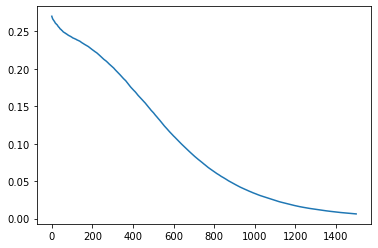

In [21]:
iris=load_iris()
x=iris.data[0:99,[0,2]]
y=iris.target[0:99]

np.random.seed(5)
tf.random.set_seed(5)
 
model=Sequential()
model.add(Dense(1, activation='sigmoid',input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
history=model.fit(x,y,epochs=1500,verbose=False)
 
plt.plot(history.history['loss'])


In [24]:
def get_w(model,layer,neuron,index):
    layer=model.layers[layer]
    return layer.get_weights()[0][index,neuron]
  
  
  
def get_b(model,layer,neuron):
    layer=model.layers[layer]
    return layer.get_weights()[1][neuron]
 
 
w_31 =get_w(model,0,0,0)
w_32 =get_w(model,0,0,1)
b_3 =get_b(model,0,0)
w_4=get_w(model,1,0,0)
b_4 =get_b(model,1,0)
print(w_31,w_32,b_3,w_4,b_4,sep="\t\t")

-1.2757663		3.4290311		-2.437649		5.231714		-2.5284233


In [30]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
 
def predict_formula(x1,x2):
    part1=w_4*sigmoid(w_31*x1+w_32*x2+b_3)
    part2=b_4
    z=part1+part2
 
    return sigmoid(z)
n=25
print(w_31,w_32,b_3,w_4,b_4,sep="\t\t")
print(x[n,0],x[n,1])
print(y[n])
print("Con la formula",predict_formula(x[n,0],x[n,1]))
print("Con Keras:",model.predict([[x[n,0],x[n,1]]]))

-1.2757663		3.4290311		-2.437649		5.231714		-2.5284233
5.0 1.6
0
Con la formula 0.087253515155528
Con Keras: [[0.08725345]]
